<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/4_Data_Wrangling_Avanzado/data_wrangling_avanzado.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Data Wrangling Avanzado


## Tabla de Contenidos

I. Data Wrangling Avanzado

    I. Tabla de Contenidos

II. Table of Contents

    I. Introducción
    II. Pandas y Cadenas de caracteres
        I. count
        II. Ejercicio
        III. contains
        IV. lower, upper y title
        V. split

III. ¿Cómo organizar la información? OLAP, OLTP y Tidy data

    I. OLTP y OLAP
    II. Tidy data
        I. Tuberculosis
            I. Tabla 1
            II. Tablas 2.a y 2.b
            III. Tabla 3
            IV. Tabla 4
            V. Tabla 5
    III. Melt
        I. Ejercicios
        II. Ejercicios

IV. Series de Tiempo

    I. Datetime y metodos de manipulacion de series de tiempo
    II. Ventanas y Medias moviles
    III. Shift y Diff

## Introducción

En esta clase vamos a ver cómo hacer manejo avanzado de datos a partir, tanto en cadenas de caracteres como en series de tiempo. El primer dataset que vamos a utilizar es del portal de datos abiertos de España.

In [1]:
# !pip install seaborn
# !pip install numpy==1.18.5

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./Paro_por_municipio.csv')

In [4]:
df.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,1.0,16.0,3.709269e+07,48191.568537
1,2,1002,Amurrio,1,16,766.0,10260.0,1.0,16.0,1.799114e+08,90623.621986
2,3,1003,Aramaio,1,16,18.0,1502.0,1.0,16.0,1.377066e+08,58592.914048
3,4,1004,Artziniega,1,16,110.0,1840.0,1.0,16.0,5.130078e+07,31498.524044
4,5,1006,Armiñón,1,16,12.0,234.0,1.0,16.0,2.380288e+07,33293.805036


Generalmente cuando en un dataset encontramos campos de texto es recomendable analizar si la carga se hizo con un buen criterio y no hay errores en la carga. Vamos a prestar atención a los campos Texto y PAD_1_COD_PROV.

In [5]:
df["Texto"].head()

0    Alegría-Dulantzi
1             Amurrio
2             Aramaio
3          Artziniega
4             Armiñón
Name: Texto, dtype: object

Noten que el primer valor incluye un "-" como separador

Vamos a comenzar eliminando las filas que tienen null el campo Texto, para facilitar el análisis posterior.

In [6]:
df = df[~df["Texto"].isnull()]

## Pandas y Cadenas de caracteres

Cuando una pd.Series es de tipo object Pandas permite acceder a métodos para operar sobre strings llamando al método **.str**.

### count

El método **.str.count()** permite contar cuántas ocurrencias de un patrón hay en una Series. Para ello se puede pasar una regex. Las regex o expresiones regulares son una cadena de caracteres que define una búsqueda de un patrón. En esta clase no vamos a ahondar en regex pero sí podemos mencionar que:
- Si pasamos un carácter en particular nos va a matchear cuántas veces aparece.
- El carácter . funcion como comodín, con lo cual cualquier caracter va a matchear.

Entonces, si queremos saber cuántas veces aparece el símbolo "-" en cada término podemos hacer:

In [7]:
df["Texto"].str.count("-").head()

0    1
1    0
2    0
3    0
4    0
Name: Texto, dtype: int64

Ahora, nos llama la atención que el símbolo "-" aparece en la primera fila, ¿será algo común?

In [8]:
df["Texto"].str.count("-").value_counts()

Texto
0    16009
1      222
2        4
Name: count, dtype: int64

### Ejercicio

1- Ver los casos que tiene 2 "-" en el nombre.

In [9]:
filtro = df["Texto"].str.count("-") == 2
df[filtro]

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length
4460,4461,28901,Lozoyuela-Navas-Sieteiglesias,28,13,82.0,1210.0,28.0,13.0,9.022504e+07,41743.297851
4809,4810,31199,Oroz-Betelu/Orotz-Betelu,31,15,6.0,153.0,31.0,15.0,4.376475e+07,30033.101103
12630,12631,28901,Lozoyuela-Navas-Sieteiglesias,28,13,82.0,1237.0,NaN,NaN,9.022504e+07,41743.297139
12979,12980,31199,Oroz-Betelu/Orotz-Betelu,31,15,6.0,149.0,NaN,NaN,4.376475e+07,30033.100830


2- Graficar un histograma con la cantidad de caracteres en la columna Texto usando contains. Tip: pueden usar el método .hist.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df["Texto"].str.len()

0        16
1         7
2         7
3        10
4         7
         ..
16334     4
16335     8
16336    21
16337     5
16338     7
Name: Texto, Length: 16235, dtype: int64

<Axes: >

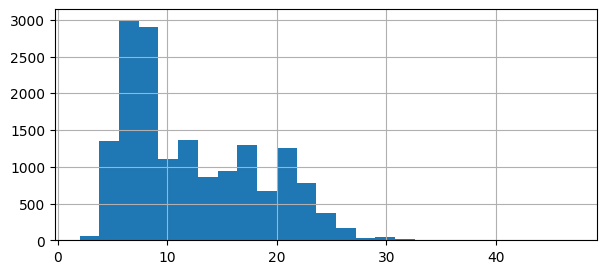

In [12]:
df["Texto"].str.len().hist(bins=25, figsize=(7, 3))

3- Mostrar las diferencias entre usar **.str.count()** y **.str.len()**. Para ello usen el método **pd.Series.equals()** y comparen el método usado en el ejercicio anterior con aplicar .str.len()

In [13]:
df["Texto"].str.count("")

0        17
1         8
2         8
3        11
4         8
         ..
16334     5
16335     9
16336    22
16337     6
16338     8
Name: Texto, Length: 16235, dtype: int64

In [14]:
df["Texto"].str.len()

0        16
1         7
2         7
3        10
4         7
         ..
16334     4
16335     8
16336    21
16337     5
16338     7
Name: Texto, Length: 16235, dtype: int64

In [15]:
(df["Texto"].str.count("") - 1).equals(df["Texto"].str.len())

True

In [16]:
(df["Texto"].str.count("")).equals(df["Texto"].str.len())

False

### contains

Digamos que queremos encontrar nombres de ciudades vascas. Para ello sabemos que "herri" en Euskera significa lugar, con lo que esperamos encontrar "erri" en una gran cantidad de ciudades. Vamos a filtrar trayendo solamente las ciudades que incluyen "erri" dentro de su nombre con el método **.str.contains**.

In [17]:
df["Texto"].str.contains("erri",case=False)

0        False
1        False
2        False
3        False
4        False
         ...  
16334    False
16335    False
16336    False
16337    False
16338    False
Name: Texto, Length: 16235, dtype: bool

In [18]:
df[df["Texto"].str.contains("erri",case=False)].head() # case es para considerar mayúsculas y minúsculas o no

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length
33,34,1046,Erriberagoitia/Ribera Alta,1,16,26.0,745.0,1.0,16.0,2.227260e+08,114217.030007
34,35,1047,Ribera Baja/Erribera Beitia,1,16,72.0,1353.0,1.0,16.0,4.706702e+07,42082.113185
162,163,3025,Benferri,3,10,161.0,1920.0,3.0,10.0,2.002354e+07,21212.706211
2026,2027,13081,Terrinches,13,8,122.0,748.0,13.0,8.0,9.099513e+07,41739.202048
2506,2507,17056,Cornellà del Terri,17,9,55.0,2279.0,17.0,9.0,5.058085e+07,38058.585347


In [19]:
df[df["Texto"].str.contains("erri",case=False)].shape 

(48, 11)

### lower, upper y title

Supongamos que queremos estar seguros que las nombres están estandarizados... podemos elegir pasar todo a minúscula o a mayúscula de la siguiente manera:

In [20]:
df["Texto"].str.lower().head()

0    alegría-dulantzi
1             amurrio
2             aramaio
3          artziniega
4             armiñón
Name: Texto, dtype: object

In [21]:
df["Texto"].str.upper().head()

0    ALEGRÍA-DULANTZI
1             AMURRIO
2             ARAMAIO
3          ARTZINIEGA
4             ARMIÑÓN
Name: Texto, dtype: object

También podemos aplicar mayúscula a la primera letra y al resto minúscula, con **.str.title**. Este método toma en consideración espacios o símbolos no alfabéticos. Es decir, va a comenzar con mayúscula los términos después de un espacio, "-" o "/". Por ejemplo

In [22]:
# filtra y muestra la columna Texto con el resultado
df["Texto"][df["Texto"].str.count("-") == 2].str.title() 

4460     Lozoyuela-Navas-Sieteiglesias
4809          Oroz-Betelu/Orotz-Betelu
12630    Lozoyuela-Navas-Sieteiglesias
12979         Oroz-Betelu/Orotz-Betelu
Name: Texto, dtype: object

### split

En el ejemplo anterior encontramos el uso de "/". En este caso se refiere a que el nombre de la ciudad (Oroz-Betelu/Orotz-Betelu) tiene dos nombres oficiales, uno en español y otro en vasco. O sea, en vez de tener un solo valor, termina siendo una columna multivaluada, lo cual no es recomendable.

Supongamos que queremos estandarizar el problema y quedarnos sólo con el nombre que aparece primero, ¿cómo podemos hacerlo?

Primero veamos algunos ejemplos otros ejemplos de nombres con "/":

In [23]:
# me filtra aquellos valores de Texto que contienen al menos una ocurrencia del caracter /
# ponerlo asi da lo mismo: df[df["Texto"].str.count("/") > 0]["Texto"]
multivaluado = df["Texto"][df["Texto"].str.count("/") > 0]

In [24]:
# me devuelve un array sin duplicados, y de el estoy viendo los primeros 10 valores
multivaluado.unique()[:10]

array(['Ayala/Aiara', 'Baños de Ebro/Mañueta', 'Campezo/Kanpezu',
       'Elburgo/Burgelu', 'Elvillar/Bilar', 'Labastida/Bastida',
       'Lanciego/Lantziego', 'Laudio/Llodio',
       'Moreda de Álava/Moreda Araba', 'Erriberagoitia/Ribera Alta'],
      dtype=object)

Nota: en un primer momento uno podría pensar que en este dataset el primer elemento debería ser siempre el nombre en, por ejemplo, español y el segundo en vasco... Sin embargo, no es así :-S

Vamos a usar **.str.split()**, vale la pena mencionar que el método devuelve una lista con un elemento por cada separación que pudo realizar. Para ello recibe como parámetro un string que es un patrón que va a usar, justamente, para dividir la cadena de caracteres. Comúnmente sólo vamos a pasarle un elemento por el cual splitear.

In [25]:
df["Texto"].str.split() # por default split separa por espacios en blanco

0               [Alegría-Dulantzi]
1                        [Amurrio]
2                        [Aramaio]
3                     [Artziniega]
4                        [Armiñón]
                   ...            
16334                       [Biel]
16335                   [Marracos]
16336    [Villamayor, de, Gállego]
16337                      [Ceuta]
16338                    [Melilla]
Name: Texto, Length: 16235, dtype: object

Noten en el ejemplo anterior que si devuelve una lista con un solo elemento es que no matcheó y, por lo tanto, no dividió el string.

Yendo a nuestro problema, separamos por el caracter '/'. Notar como se transforman los nombres compuestos
MUCHO CUIDADO! Nuestros strings ahora son listas!! :o

In [26]:
df["Texto"].str.split("/").head()

0    [Alegría-Dulantzi]
1             [Amurrio]
2             [Aramaio]
3          [Artziniega]
4             [Armiñón]
Name: Texto, dtype: object

Entonces, nos quedamos con la primera versión del nombre al separar por "/"

In [27]:
texto_para_split = df["Texto"][df["Texto"].str.count("/") > 0] # guardo en una variable casos con /

texto_para_split.str.split("/").apply(lambda x: x[0]) # para indexar las listas tengo que usar apply

7                   Ayala
8           Baños de Ebro
12                Campezo
16                Elburgo
18               Elvillar
               ...       
15372              Novelé
15412             Sagunto
15447          Vilallonga
15705    Karrantza Harana
15757              Urduña
Name: Texto, Length: 234, dtype: object

Por otra parte, si quisiéramos guardar cada nombre en una columna separada podemos hacerlo usando la opción expand:

In [28]:
texto_para_split.str.split("/", expand=True)

,0,1
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar
...,...,...
15372,Novelé,Novetlè
15412,Sagunto,Sagunt
15447,Vilallonga,Villalonga
15705,Karrantza Harana,Valle de Carranza


Podemos asignar el resultado de expand de la siguiente manera:

In [29]:
# generamos dos nuevas columnas a las que les asignamos el resultado del split expandido
df[["nombre_1", "nombre_2"]] = df["Texto"].str.split("/", expand=True) # usamos el df original y expandimos

In [30]:
df[["nombre_1", "nombre_2"]].head() # vemos que hay nulls que nombre_2 porque tienen un solo nombre

,nombre_1,nombre_2
0,Alegría-Dulantzi,None
1,Amurrio,None
2,Aramaio,None
3,Artziniega,None
4,Armiñón,None


**df.loc[...]**: loc es un método de indexación de pandas que permite seleccionar datos en un DataFrame basado en etiquetas de filas y columnas. La parte dentro de loc se divide en dos secciones separadas por una coma: la selección de filas y la selección de columnas.

* La primera parte dentro de loc (antes de la coma) es ~df["nombre_2"].isnull(). Esto se utiliza para seleccionar únicamente las filas donde la columna "nombre_2" no es nula.

* La segunda parte (después de la coma) es ["nombre_1", "nombre_2"]. Esto especifica que queremos seleccionar solo las columnas "nombre_1" y "nombre_2" del DataFrame.

In [31]:
df.loc[~df["nombre_2"].isnull(), ["nombre_1", "nombre_2"]].head() # noten el filtro booleano

,nombre_1,nombre_2
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar


#### Paréntesis aclarativo sobre loc - iloc

En pandas, tanto loc como iloc son métodos utilizados para seleccionar datos en un DataFrame, pero funcionan de manera diferente y se usan en contextos distintos. Aquí está la diferencia entre loc e iloc:

**loc**
* Selección por etiquetas: loc se utiliza para seleccionar datos basados en las etiquetas de las filas y las columnas. Es decir, puedes seleccionar por los nombres de las filas y columnas que tienen en el DataFrame.

* Inclusivo: Los rangos de etiquetas que especifiques son inclusivos. Por ejemplo, si tienes un rango de filas 2:4 con loc, seleccionará las filas 2, 3 y 4.

* Sintaxis: _df.loc[fila_etiqueta, columna_etiqueta]_
  
* Ejemplo:

```python
df.loc[0:2, ['columna1', 'columna2']] # Esto selecciona las filas con etiquetas 0, 1 y 2 y las columnas 'columna1' y 'columna2'.
```


**iloc**
* Selección por posición: iloc se utiliza para seleccionar datos basados en la posición entera de las filas y columnas. Es decir, seleccionas datos usando índices numéricos, que empiezan desde 0.

* Exclusivo: Los rangos de posiciones especificados son exclusivos en el final. Por ejemplo, si tienes un rango de filas 2:4 con iloc, seleccionará las filas 2 y 3, pero no la 4.

* Sintaxis: _df.iloc[posicion_fila, posicion_columna]_

* Ejemplo:

```python
df.iloc[0:3, [0, 1]] # Esto selecciona las filas en posiciones 0, 1 y 2 y las columnas en posiciones 0 y 1.
```


## ¿Cómo organizar la información? OLAP, OLTP y Tidy data

Existen diversas formas de organizar la información. En general, qué vamos a hacer con la información es clave para entender cómo organizarla. Veamos algunos conceptos habituales a la hora de trabajar con datos.

### OLTP y OLAP

La sigla OLTP viene de Online transaction processing y se refiere a transacciones que ocurren en tiempo real. Un ejemplo típico son los ATMs (automated teller machine), más conocidos como "cajeros automáticos". 

En este aspecto transacción tiene dos acepciones y ambas son válidas: por un lado, se procesan transacciones en término de bases de datos (que vamos a ver a continuación), por otro lado, se suele aplicar a transacciones económicas en donde se intercambian entidades económicas. 

Sistemas OLTP son la mayoría de los sistemas tradicionales que conocemos, especialmente los sistemas bancarios. Estos son sistemas transaccionales (en la primera acepción de arriba) porque intentan cumplir 4 objetivos (**ACID**):

- Las transacciones son operaciones **atómicas**: se hacen por completo o no se hacen. Imagínense una transferencia bancaria, ésto requiere debitar en una cuenta y acreditar en otra. Si la operación no fuera atómica y fallara podríamos quedarnos en un estado inesperado en el cual se debite de la primera y no se acredite en la segunda. Para evitar ésto, la atomicidad garantiza que si la operación falla en alguna parte del proceso revertimos completamos la operación y no impactamos ningún cambio (hacemos *rollback*).

- Toda transacción debe mantener la **consistencia** de la base de datos, es decir, debe respetar una serie de restricciones. Por ejemplo, podemos pensar que para que una tarjeta de crédito sea de extensión de una cuenta esa cuenta debe existir previamente. Otro ejemplo, puede ser que no pueden existir dos cuentas bancarias diferentes con el mismo número.

- Además, los sistemas transaccionales (especialmente los sistemas OLTP) requieren garantizar el **aislamiento** de las operaciones. Es común que estos sistemas necesiten resolver miles de operaciones concurrentes (es decir, que suceden en simultáneo), el aislamiento consiste en que esas operaciones dejen en la base de datos el mismo estado que si las operaciones fueran secuenciales (es decir, una por vez). Incluso, si una de esas falla, no debería alterar el resultado.

- **Durabilidad**


Para ésto, se implementan diferentes algoritmos a fin de asegurar que no se generen errores ni competencias entre usuarios que estan intentando acceder a los mismos registros a la vez.

OLAP (Online Analytical Processing) por otra parte se refiere a todos los sistemas utilizados para analisis y reportes de negocios (Business Intelligence), en los cuales se realizan diferentes operaciones de agregacion sobre los datos, a fin de proveer a los usuarios con informacion relevante. 

Las herramientas OLAP permiten realizar análisis multidimensionales, tomando en consideración distintas dimensiones y métricas. En este sentido, está lo que se conoce como "cubo OLAP". El cubo OLAP es un array multidimensional que permite analizar la información vista desde distintos ángulos. Por ejemplo, podemos querer ver un reporte financiero por producto, por ciudad, por tiempo, etc. Cada uno de estos términos es una dimensión del análisis.

Estos sistemas generalmente requieren procesos de carga y transformaciones masivas que pueden durar horas o días, y permiten presentan la información de un modo tal que el análisis es en tiempo real, no así la información que usa. 

De manera resumida:
* OLTP: sistema que guarda registros siguiendo un patrón determinado (buenas prácticas como ACID)
* OLAP: sistema que realiza un análisis de dichos registros

## Tidy data

**Tidy data** es un trabajo escrito por Hadley Wickham (de la empresa RStudio) que se ha difundido mucho, especialmente en la comunidad de R, sobre buenas prácticas a la hora de estructurar información tabular. Pueden consultar el trabajo acá: https://vita.had.co.nz/papers/tidy-data.pdf

La información tabular consta de **filas** y **columnas**. Las columnas siempre tienen una etiqueta y las filas sólo a veces.

Los *datasets* constan de **valores**, éstos pueden ser numéricos o no numéricos . En el caso en que sea un valor numérico representa una cantidad, si no es numérico es una cualidad. Además, los valores miden o caracterizan un determinado atributo (altura, peso, temperatura, etc.). Este atributo se conoce como **variable**. Por último, esa variable se corresponde con una determinada unidad observada. Generalmente llamamos a eso simplemente **observación** (por ejemplo, la persona a la que se le midió la altura).

Dicho ésto, Wickham define un dataset *tidy* u ordenado como aquel que cumple la tercera forma normal de bases de datos, pero con un lenguaje más cercano al campo del análisis de datos y pensando en información contenida en una tabla, y no en una base de datos con muchas tablas. Las condiciones son:

- Cada variable forma una columna.
- Cada observación forma una fila.
- Cada tipo de unidad observacional forma una tabla.

Además, describe 5 de los errores más comunes a la hora de ordenar la información:

- Los nombres de columna en vez de ser nombres de variables son valores
- Muchas variables se guardan en una sola columna.
- Las variables se guardan tanto en columnas como en filas.
- Distintos tipos de unidades observacionales se guardan en una misma tabla.
- Una única unidad observacional se almacena en distintas tablas.4

### Tuberculosis

A continuación vamos a ver un dataset de tuberculosis representado de distintas maneras... 

#### Tabla 1

En esta primera representación de la información vemos que una misma columna (type) contiene dos variables (cases y population)

|country|year|type|count|
| --- | --- | --- | --- |
|Afghanistan|1999|cases|745|
|Afghanistan|1999|population|19987071|
|Afghanistan|2000|cases|2666|
|Afghanistan|2000|population|20595360|
|Brazil|1999|cases|37737|
|Brazil|1999|population|172006362|

#### Tablas 2.a y 2.b
En este caso separamos la tabla en dos tablas. Una donde vemosla población y otra donde vemos la cantidad de casos... ¿Cuál es el problema acá?

Si bien ésto puede parecer correcto noten que la unidad observacional en realidad es un país en un año determinado... Con lo cual, lo que estamos haciendo acá es tener la misma unidad observacional en dos tablas. Además, los valores de la variable year están como nombres de columnas...


|country|1999|2000|
| --- | --- | --- |
|Afghanistan|745|2666|
|Brazil|37737|80488|
|China|212258|213766|

|country|1999|2000|
| --- | --- | --- |
|Afghanistan|19987071|20595360|
|Brazil|172006362|174504898|
|China|1272915272|1280428583|

#### Tabla 3

En este caso, perdimos las variables cases y population y calculamos un ratio. Si bien ésto cumple con ser "ordenado" estamos perdiendo las variables originales.

|country|year|rate|
| --- | --- | --- |
|Afghanistan|1999|745/19987071|
|Afghanistan|2000|2666/20595360|
|Brazil|1999|37737/172006362|
|Brazil|2000|80488/174504898|
|China|1999|212258/1272915272|
|China|2000|213766/1280428583|

#### Tabla 4
 
En la tabla 4 vemos que la variable *year*, *cases* y *population* se juntaron, con lo cual los valores de *year* pasan a formar parte de los nombres de las columnas.

|country|cases_1999|cases_2000|population_1999|population_2000|
| --- | --- | --- | --- | --- |
|Afghanistan|745|19987071|2666|20595360|
|Brazil|37737|172006362|80488|174504898|
|China|212258|1272915272|213766|1280428583|

#### Tabla 5

Finalmente, la tabla *tidy* es:

|country|year|cases|population|
| --- | --- | --- | --- |
|Afghanistan|1999|745|19987071|
|Afghanistan|2000|2666|20595360|
|Brazil|1999|37737|172006362|
|Brazil|2000|80488|174504898|
|China|1999|212258|1272915272|
|China|2000|213766|1280428583|

## Melt

Una de los métodos más útiles de Pandas para pasar de un formato *wide* o *ancho* como el de la tabla 4 a uno *largo* como el de la tabla 5 es **.melt**.

Para aplicar este método vamos a obtener un dataset de Billboard sobre las canciones mas escuchadas del 2000.

Vamos a agregar la opcion de encoding para solucionar un problema con los caracteres usados.

In [32]:
billboard = pd.read_csv('./billboard.csv', encoding='iso-8859-1')

In [33]:
billboard.shape

(317, 83)

In [34]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicios

1- Analicen el dataset, vean cuáles son las variables, qué es la observación. ¿Es necesario separarlo en dos tablas? Nota: lo que se está midiendo en las columnas x1st.week a x76th.week es la posición en el ranking de las 100 canciones más escuchadas en esa semana. Es decir, x1st.week es la posición en el ranking durante la primera semana que esa canción fue top 100.

2- ¿Por qué creen que hay tantas columnas con valores nulos?

3- ¿Cómo podríamos hacer este dataset más ordenado? (no miren la continuación de la notebook :-S)

Veamos primero como luce el dataset

In [35]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lo que querríamos es poder mantener todas las columnas excepto las columnas que incluyen "week" en el nombre. Para poder tener un formato "tidy" u "ordenado" deberíamos tener, por un lado, una columna week que indique el número de la semana (y preferentemente que sea un entero), y por otro lado una columna ranking con el valor del ranking en esa semana. 

Para lograr ésto, vamos a usar la función **.melt**. Esta función recibe el DataFrame y vamos a usar el parámetro id_vars para pasarle la lista de columnas que van a ser constantes, es decir, que no van a variar. Con las demás columnas .melt va a:

1- tomar los nombres de columnas no incluídas en id_vars y convertirlos en una columna

2- va a tomar los valores de esas columnas y convertirlos en una segunda columna.

In [36]:
pd.melt(billboard,
        id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"]).head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


Ahora, querríamos que variable se llame week y value se llame ranking, para eso hacemos...

In [37]:
billboard_2 = pd.melt(billboard, 
                      id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"], 
                      var_name="week", 
                      value_name="ranking")

In [38]:
billboard_2.shape

(24092, 9)

In [39]:
billboard_2.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [40]:
billboard_2["artist.inverted"].value_counts()

artist.inverted
Jay-Z                380
Houston, Whitney     304
Dixie Chicks, The    304
Destiny's Child      228
Limp Bizkit          228
                    ... 
Carter, Aaron         76
Ice Cube              76
Wills, Mark           76
Lucy Pearl            76
Fragma                76
Name: count, Length: 228, dtype: int64

In [41]:
name = "Fragma"
billboard_2.query("`artist.inverted` == @name")

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x1st.week,99.0
633,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x2nd.week,NaN
950,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x3rd.week,NaN
1267,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x4th.week,NaN
1584,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x5th.week,NaN
...,...,...,...,...,...,...,...,...,...
22823,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x72nd.week,NaN
23140,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x73rd.week,NaN
23457,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x74th.week,NaN
23774,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,x75th.week,NaN


### Ejercicios

1- Quédense sólo con la parte numérica de week sin usar regex, y conviertan a número los valores de la columna.

In [42]:
billboard_2["week"] = ( 
    billboard_2["week"]
    .str.replace(".week", "")
    .str.replace("x", "")
    .str.replace("st", "")
    .str.replace("nd", "")
    .str.replace("rd", "")
    .str.replace("th", "")
)

billboard_2["week"] = billboard_2["week"].astype(int)

billboard_2.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0


2- Conviertan los valores de la columna ranking a entero. Tip: prueben usar pd.isna() para saber si un valor es nulo o no.

In [43]:
filtro_na_ranking = ~billboard_2["ranking"].isna()
billboard_2 = billboard_2[filtro_na_ranking]
billboard_2["ranking"] = billboard_2["ranking"].astype(int)
billboard_2.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57


3- Vean cuántas filas totales hay y eliminen las filas con nulos, ahora vuelvan a ver cuántas filas quedan.

In [44]:
billboard_2.shape

(5307, 9)

## Series de Tiempo

Las series de tiempo representan uno de los problemas mas interesantes en la ciencia de datos ya que refiere a eventos continuos y ordenados los cuales pueden ser independientes o tener alguna correlacion entre si. En este modulo veremos los metodos mas utilizados para manipular series de tiempo en pandas

### Datetime y metodos de manipulacion de series de tiempo

Para esta seccion vamos a utilizar el dataset de consumo energetico de Alemania.

In [48]:
df_energia = pd.read_csv('./opsd_germany_daily.csv')

In [49]:
df_energia.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Primeramente vamos a evaluar el dataset

In [51]:
df_energia.columns = ['Fecha', 'Consumo', 'Eolica', 'Solar', 'Suma_Eolica_Solar'] # Cambiamos los nombres de las columnas
df_energia.tail(10)

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Las columnas son las siguientes:
    - Date — La fecha (yyyy-mm-dd)
    - Consumo — Electricidad Consumida en GWh
    - Eolica — Produccion de energia eolica en GWh
    - Solar — Produccion de energia solar en GWh
    - Suma — Suma de las dos anteriores GWh

Antes de comenzar a explorar el dataset, veamos algunas funciones de pandas para crear fechas. El metodo to_datetime nos permite transformar un string en cierto formato a un objeto del tipo Timestamp, el cual consiste de una fecha y una hora. Podemos ver que acepta varios formatos

In [56]:
df_energia.Fecha.dtype # me da que esta columan es de tipo object, o sea texto

dtype('O')

In [52]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [53]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

Vamos a convertir el dtype de nuestra columna Fecha de object a  datetime64

In [57]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              4383 non-null   object 
 1   Consumo            4383 non-null   float64
 2   Eolica             2920 non-null   float64
 3   Solar              2188 non-null   float64
 4   Suma_Eolica_Solar  2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [59]:
df_energia["Fecha"] = pd.to_datetime(df_energia["Fecha"]) # convertimos la columna fecha en variable temporal, es decir en datos de tipo tiempo

In [60]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              4383 non-null   datetime64[ns]
 1   Consumo            4383 non-null   float64       
 2   Eolica             2920 non-null   float64       
 3   Solar              2188 non-null   float64       
 4   Suma_Eolica_Solar  2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


Convertir la columna *Fecha* en datetime nos permite filtrar usando la información temporal...

In [61]:
df_energia.head()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Podemos traernos los casos posteriores a 2009, por default a partir del 1ero de enero...

In [62]:
df_energia[df_energia["Fecha"] > "2009"].head()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
1097,2009-01-02,1161.911,NaN,NaN,NaN
1098,2009-01-03,1178.078,NaN,NaN,NaN
1099,2009-01-04,1130.021,NaN,NaN,NaN
1100,2009-01-05,1333.041,NaN,NaN,NaN
1101,2009-01-06,1340.896,NaN,NaN,NaN


Con el método **.between** podemos filtrar por un rango de fechas... 

In [63]:
df_energia[df_energia["Fecha"].between("2008", "2010")].head()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


En vez de filtrar usando años podemos pasar la fecha completa (siempre tengan presente el formato de la fecha)...

In [64]:
df_energia[df_energia["Fecha"].between("2008-01-01", "2010-01-22")].head()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


Y como si fuera poco también podemos filtrar sólo usando el año y el mes, sin especificar el día...

In [65]:
df_energia[df_energia["Fecha"].between("2008-01", "2010-02")].head()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
730,2008-01-01,1083.424,NaN,NaN,NaN
731,2008-01-02,1396.483,NaN,NaN,NaN
732,2008-01-03,1523.427,NaN,NaN,NaN
733,2008-01-04,1512.429,NaN,NaN,NaN
734,2008-01-05,1355.843,NaN,NaN,NaN


In [66]:
df_energia[df_energia["Fecha"].between("2008-01", "2010-02")].tail()

,Fecha,Consumo,Eolica,Solar,Suma_Eolica_Solar
1488,2010-01-28,1585.269,306.149,NaN,NaN
1489,2010-01-29,1493.020,145.473,NaN,NaN
1490,2010-01-30,1322.933,189.627,NaN,NaN
1491,2010-01-31,1203.635,174.109,NaN,NaN
1492,2010-02-01,1536.453,151.409,NaN,NaN


Ahora, vamos a convertir nuestra columna Fecha en un índice temporal... Esto va a crear un nuevo tipo de objeto llamado DatetimeIndex

In [69]:
 # ponemos la columna fecha como indice, siempre y cuando dicha columna no tenga valores duplicados
df_energia = df_energia.set_index("Fecha")

KeyError: "None of ['Fecha'] are in the columns"

In [70]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma_Eolica_Solar
Fecha,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


In [71]:
df_energia.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=4383, freq=None)

Primeramente vamos a agregar columnas que nos proporcionen mas informacion sobre las fechas

In [72]:
df_energia['Anio'] = df_energia.index.year
df_energia['Mes'] = df_energia.index.month
df_energia['Dia'] = df_energia.index.day_name()
df_energia.sample(5, random_state=0)

,Consumo,Eolica,Solar,Suma_Eolica_Solar,Anio,Mes,Dia
Fecha,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Como creamos el indice por las fechas, podemos localizar cualquier dia que querramos ahora

In [73]:
df_energia.loc['2017-08-10']

Consumo              1351.491
Eolica                100.274
Solar                   71.16
Suma_Eolica_Solar     171.434
Anio                     2017
Mes                         8
Dia                  Thursday
Name: 2017-08-10 00:00:00, dtype: object

Incluso podemos buscar rangos de fechas

In [74]:
df_energia.loc['2014-01-20':'2014-01-22']

,Consumo,Eolica,Solar,Suma_Eolica_Solar,Anio,Mes,Dia
Fecha,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


O buscar por algun mes en particular

In [75]:
df_energia.loc['2016-05']

,Consumo,Eolica,Solar,Suma_Eolica_Solar,Anio,Mes,Dia
Fecha,,,,,,,
2016-05-01,1078.602,179.870,147.931,327.801,2016,5,Sunday
2016-05-02,1405.185,81.868,197.183,279.051,2016,5,Monday
2016-05-03,1462.935,208.678,139.151,347.829,2016,5,Tuesday
2016-05-04,1430.136,84.961,174.185,259.146,2016,5,Wednesday
2016-05-05,1111.379,150.624,212.713,363.337,2016,5,Thursday
2016-05-06,1254.051,255.574,217.569,473.143,2016,5,Friday
2016-05-07,1149.938,315.362,215.963,531.325,2016,5,Saturday
2016-05-08,1072.653,390.557,217.819,608.376,2016,5,Sunday
2016-05-09,1403.845,360.421,207.427,567.848,2016,5,Monday


Ahora veamos como se ve nuestra data de consumo de energia

In [77]:
df_energia["Consumo"].head()

Fecha
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumo, dtype: float64

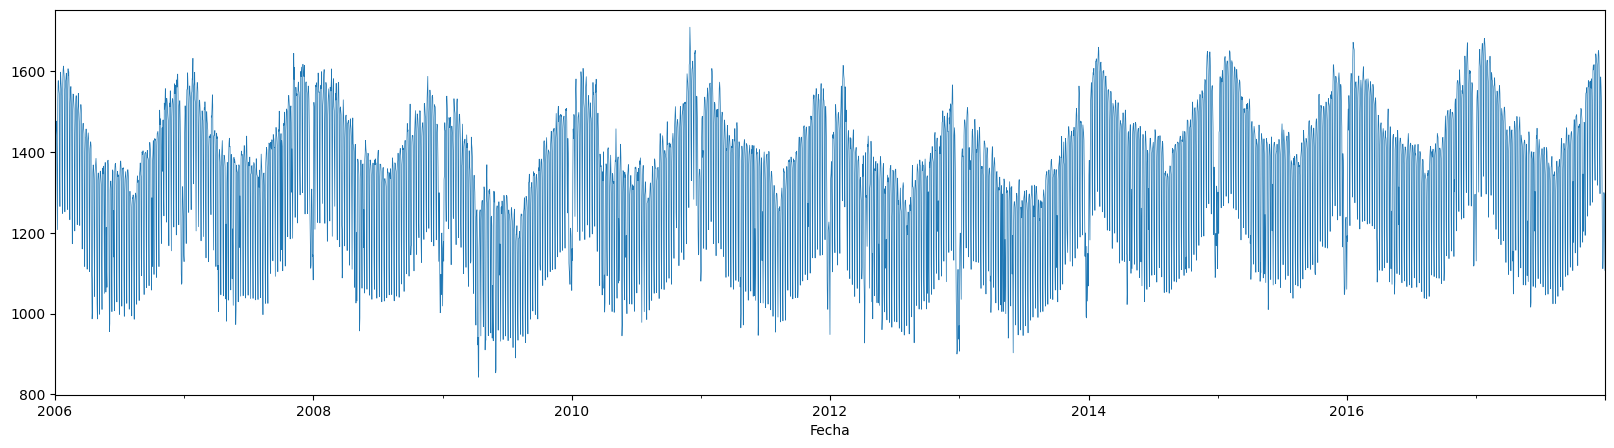

In [78]:
#! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
df_energia['Consumo'].plot(linewidth=0.5, figsize=(20,5));

## Ventanas y Medias moviles

Las ventanas moviles se refiere a aplicar alguna operacion de agregacion, por ejemplo el promedio sobre un conjunto de datos ordenados a la vez, por ejemplo el promedio de los ultimos 6 dias sobre cada conjunto ordenado de 6 dias en el dataset. Veamos un ejemplo para entenderlo mejor

En este ejemplo, aplicamos la media movil. Esto consiste en, por ejemplo, tomar x cantidad de valores y el ultimo de esos valores será el promedio. Tal es así que observaremos que según el número que le pasemos como parámetro a **rolling(...)** en este caso será el número de días que tome. Los primeros n-1 días estarán en NaN justamente porque se comienza a mostrar el resultado del promedio en el valor n.

In [81]:
opsd_7d = df_energia["Consumo"].rolling(6).mean()
opsd_7d.head(20)

Fecha
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
2006-01-06    1371.668833
2006-01-07    1410.186000
2006-01-08    1381.430000
2006-01-09    1395.895000
2006-01-10    1415.844000
2006-01-11    1432.518167
2006-01-12    1457.493667
2006-01-13    1498.279500
2006-01-14    1523.606167
2006-01-15    1479.631500
2006-01-16    1477.436000
2006-01-17    1480.957167
2006-01-18    1484.241167
2006-01-19    1486.455833
2006-01-20    1516.565667
Name: Consumo, dtype: float64

Podemos observar como las primeras 5 mediciones son Nan, ya que utiliza los primeros 5 valores para calcular a partir del 6to dia la media. El valor en el 7mo dia va a ser calculado con los datos del 2do al 6to dia, y asi sucesivamente.

Este tipo de metodos son particularmente utiles en analisis financiero.

## Shift y Diff

La operacion de Shift, como su nombre lo dice traducido al castellano, desplazar los datos una cantidad N de periodos. Veamoslo con el ejemplo del consumo, suponiendo que quiero crear otra columna con el consumo total del periodo anterior para poder compararlo con el actual

In [83]:
df_energia['ConsumoAyer'] = df_energia['Suma_Eolica_Solar'].shift(periods=1)


Veamos como quedo ahora el dataset

In [84]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma_Eolica_Solar,Anio,Mes,Dia,ConsumoAyer
Fecha,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,266.352
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,238.838
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,756.524
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,822.371
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,603.575
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,748.376
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,411.037
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,520.586
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,614.131


Podemos observar como la columna 'ConsumoAyer' es el valor de la columna 'Suma_Eolica_Solar' exactamente del periodo anterior. Esto se puede realizar con tantos periodos como uno desee, pero hay que tener cuidado porque al inicio de nuestro dataset van a quedar valores Nan por la cantidad de periodos que elijamos. Hay que evaluar con que valor completamos esos valores.

Por ultimo supongamos que deseamos hacer la diferencia fila a fila del valor de ayer con el valor de hoy para el consumo total. Aqui nos conviene utilizar el metodo diff.

In [85]:
df_energia['Diferencia'] = df_energia['Suma_Eolica_Solar'].diff(1)

In [86]:
df_energia.tail(10)

,Consumo,Eolica,Solar,Suma_Eolica_Solar,Anio,Mes,Dia,ConsumoAyer,Diferencia
Fecha,,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,266.352,-27.514
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,238.838,517.686
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,756.524,65.847
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,822.371,-218.796
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,603.575,144.801
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,748.376,-337.339
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,411.037,109.549
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,520.586,93.545
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,614.131,114.583


Link del gobierno de Argentina para acceder a series/datasets de tiempo de distintos tópicos:

https://datos.gob.ar/series/api

In [95]:
df_mortalidad_infantil = pd.read_csv("http://datos.salud.gob.ar/dataset/2eff770c-1c2b-4a22-9281-c3b5e9412086/resource/c1253897-d507-41f7-a3e1-6ed756e7243b/download/tasa-mortalidad-infantil-deis-1990-2022.csv")

In [96]:
df_mortalidad_infantil.head()

,indice_tiempo,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,...,mortalidad_infantil_neuquen,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego
0,1990-01-01,25.6,16.8,24.2,34.6,22.2,31.7,35.8,20.6,24.3,...,16.9,23.1,32.3,24.4,29.7,20.7,28.3,28.3,28.5,27.9
1,1991-01-01,24.7,15.2,24.2,31.8,22.3,28.5,32.3,19.1,23.2,...,15.6,24.1,32.9,24.6,28.6,19.9,22.2,29.2,28.6,16.7
2,1992-01-01,23.9,14.9,23.5,28.1,19.6,27.7,33.5,19.9,22.1,...,16.2,22.7,32.8,23.7,23.7,20.6,20.9,28.7,28.8,11.2
3,1993-01-01,22.9,14.6,22.3,23.1,20.8,26.9,34.3,18.0,22.7,...,16.2,21.4,27.7,21.3,26.2,18.5,19.8,28.9,27.1,15.2
4,1994-01-01,22.0,14.3,21.8,29.8,20.0,26.1,31.4,18.4,20.4,...,15.3,19.6,29.8,21.3,27.6,15.9,17.8,29.0,23.9,13.6


In [97]:
df_mortalidad_infantil.tail()

,indice_tiempo,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,...,mortalidad_infantil_neuquen,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego
28,2018-01-01,8.8,6.0,9.0,9.3,7.4,12.8,9.4,8.3,9.7,...,6.1,8.3,10.0,9.1,8.8,7.6,8.4,9.7,11.2,7.4
29,2019-01-01,9.2,7.3,9.1,10.5,7.5,12.0,12.4,7.8,9.8,...,5.4,7.8,10.6,9.3,8.6,7.4,8.2,6.6,13.3,7.1
30,2020-01-01,8.4,4.9,8.2,9.7,7.1,10.9,10.0,6.0,8.1,...,5.2,7.6,12.4,8.7,8.0,8.7,8.4,8.0,10.4,7.4
31,2021-01-01,8.0,4.6,7.9,7.6,6.6,11.2,9.5,9.2,9.5,...,4.8,8.6,8.7,7.3,9.8,7.4,7.8,6.8,9.9,5.7
32,2022-01-01,8.4,6.0,7.9,5.9,7.5,13.6,10.9,8.4,10.8,...,4.4,8.2,8.9,8.3,8.5,9.8,8.3,9.0,11.0,3.9


In [98]:
df_mortalidad_infantil.shape

(33, 26)

In [99]:
df_mortalidad_infantil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   indice_tiempo                          33 non-null     object 
 1   mortalidad_infantil_argentina          33 non-null     float64
 2   mortalidad_infantil_caba               33 non-null     float64
 3   mortalidad_infantil_buenosaires        33 non-null     float64
 4   mortalidad_infantil_catamarca          33 non-null     float64
 5   mortalidad_infantil_cordoba            33 non-null     float64
 6   mortalidad_infantil_corrientes         33 non-null     float64
 7   mortalidad_infantil_chaco              33 non-null     float64
 8   mortalidad_infantil_chubut             33 non-null     float64
 9   mortalidad_infantil_entrerios          33 non-null     float64
 10  mortalidad_infantil_formosa            33 non-null     float64
 11  mortalid

In [100]:
df_mortalidad_infantil["indice_tiempo"] = pd.to_datetime(df_mortalidad_infantil["indice_tiempo"])

In [101]:
df_mortalidad_infantil = df_mortalidad_infantil.set_index("indice_tiempo")

In [102]:
df_mortalidad_infantil.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01'],
              dtype='datetime64[ns]', name='indice_tiempo', freq=None)

In [103]:
df_mortalidad_infantil["promedio"] = (
    df_mortalidad_infantil.filter(like="mortalidad_infantil")
                          .mean(axis=1)  
)
df_mortalidad_infantil.head()

,mortalidad_infantil_argentina,mortalidad_infantil_caba,mortalidad_infantil_buenosaires,mortalidad_infantil_catamarca,mortalidad_infantil_cordoba,mortalidad_infantil_corrientes,mortalidad_infantil_chaco,mortalidad_infantil_chubut,mortalidad_infantil_entrerios,mortalidad_infantil_formosa,...,mortalidad_infantil_rionegro,mortalidad_infantil_salta,mortalidad_infantil_sanjuan,mortalidad_infantil_sanluis,mortalidad_infantil_santacruz,mortalidad_infantil_santafe,mortalidad_infantil_santiagodelestero,mortalidad_infantil_tucuman,mortalidad_infantil_tierradelfuego,promedio
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
1990-01-01,25.6,16.8,24.2,34.6,22.2,31.7,35.8,20.6,24.3,33.2,...,23.1,32.3,24.4,29.7,20.7,28.3,28.3,28.5,27.9,26.752
1991-01-01,24.7,15.2,24.2,31.8,22.3,28.5,32.3,19.1,23.2,24.5,...,24.1,32.9,24.6,28.6,19.9,22.2,29.2,28.6,16.7,24.992
1992-01-01,23.9,14.9,23.5,28.1,19.6,27.7,33.5,19.9,22.1,32.3,...,22.7,32.8,23.7,23.7,20.6,20.9,28.7,28.8,11.2,24.148
1993-01-01,22.9,14.6,22.3,23.1,20.8,26.9,34.3,18.0,22.7,27.9,...,21.4,27.7,21.3,26.2,18.5,19.8,28.9,27.1,15.2,22.992
1994-01-01,22.0,14.3,21.8,29.8,20.0,26.1,31.4,18.4,20.4,30.7,...,19.6,29.8,21.3,27.6,15.9,17.8,29.0,23.9,13.6,22.144


In [ ]:
plt.figure(figsize=(20, 6))

columnas_a_graficar = ["promedio"]

df_mortalidad_infantil[columnas_a_graficar].plot()

# Ajustar la posición de la leyenda
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mueve la leyenda fuera del gráfico

# plt.xticks(ticks=df.index, rotation=45)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Indice de mortalidad infantil')
plt.title('Mortalidad infantil nivel nacional')
plt.grid(True)

# Ajustar el espacio para incluir la leyenda
# plt.tight_layout()

plt.show()
